In [1]:
# SB柳田の通算成績を可視化
# 利用パッケージ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# データ取得
url = 'https://npb.jp/bis/players/31835133.html'
df = pd.read_html(url)

# テーブル数を確認
print(len(df))

2


In [9]:
df[0]

,0,1
0,ポジション,外野手
1,投打,右投左打
2,身長／体重,188cm／93kg
3,生年月日,1988年10月9日
4,経歴,広島商 - 広島経済大
5,ドラフト,2010年ドラフト2位


In [4]:
df[1]

,年度,所属球団,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,盗塁刺,犠打,犠飛,四球,死球,三振,併殺打,打率,長打率,出塁率
0,2011.0,福岡ソフトバンク,6,5,5,1,0,0,0,0,...,0,0,0,0,0,3,0,0.000,0.000,0.000
1,2012.0,福岡ソフトバンク,68,212,195,17,48,10,1,5,...,1,2,0,10,5,56,2,0.246,0.385,0.300
2,2013.0,福岡ソフトバンク,104,337,298,48,88,19,2,11,...,1,0,0,32,7,96,3,0.295,0.483,0.377
3,2014.0,福岡ソフトバンク,144,615,524,91,166,18,4,15,...,6,0,3,72,16,131,8,0.317,0.452,0.413
4,2015.0,福岡ソフトバンク,138,605,502,110,182,31,1,34,...,8,0,1,88,14,101,9,0.363,0.631,0.469
5,2016.0,福岡ソフトバンク,120,536,428,82,131,31,4,18,...,2,0,0,100,8,97,8,0.306,0.523,0.446
6,2017.0,福岡ソフトバンク,130,551,448,95,139,30,1,31,...,7,0,7,89,7,123,6,0.310,0.589,0.426
7,2018.0,福岡ソフトバンク,130,550,475,95,167,29,5,36,...,7,0,5,62,8,105,8,0.352,0.661,0.431
8,2019.0,福岡ソフトバンク,38,157,128,17,37,6,1,7,...,1,0,0,28,1,28,4,0.289,0.516,0.420
9,2020.0,福岡ソフトバンク,119,515,427,90,146,23,5,29,...,2,0,3,84,1,103,2,0.342,0.623,0.449


In [15]:
# 出塁率と長打率を引き出す

data = df[1]
data = data.loc[:, ['年度', '出塁率', '長打率']]

data

,年度,出塁率,長打率
0,2011.0,0.000,0.000
1,2012.0,0.300,0.385
2,2013.0,0.377,0.483
3,2014.0,0.413,0.452
4,2015.0,0.469,0.631
5,2016.0,0.446,0.523
6,2017.0,0.426,0.589
7,2018.0,0.431,0.661
8,2019.0,0.420,0.516
9,2020.0,0.449,0.623


In [16]:
# 足してOPS列を作成

data.loc[:, 'ops'] = data['出塁率'] + data['長打率']
data

,年度,出塁率,長打率,ops
0,2011.0,0.000,0.000,0.000
1,2012.0,0.300,0.385,0.685
2,2013.0,0.377,0.483,0.860
3,2014.0,0.413,0.452,0.865
4,2015.0,0.469,0.631,1.100
5,2016.0,0.446,0.523,0.969
6,2017.0,0.426,0.589,1.015
7,2018.0,0.431,0.661,1.092
8,2019.0,0.420,0.516,0.936
9,2020.0,0.449,0.623,1.072


In [17]:
# 初年度と通算を削除
data = data.drop(data.index[[0,14]])
data

,年度,出塁率,長打率,ops
1,2012.0,0.300,0.385,0.685
2,2013.0,0.377,0.483,0.860
3,2014.0,0.413,0.452,0.865
4,2015.0,0.469,0.631,1.100
5,2016.0,0.446,0.523,0.969
6,2017.0,0.426,0.589,1.015
7,2018.0,0.431,0.661,1.092
8,2019.0,0.420,0.516,0.936
9,2020.0,0.449,0.623,1.072
10,2021.0,0.388,0.541,0.929


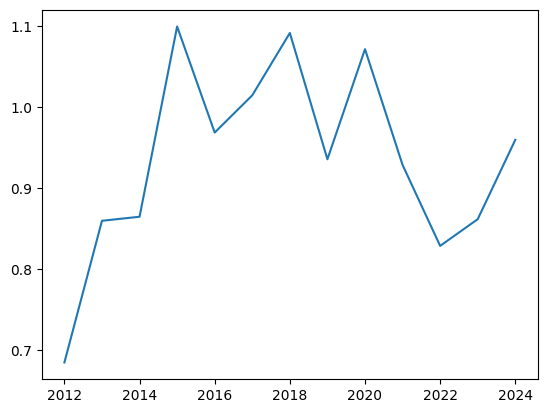

In [18]:
# OPSの推移
plt.plot(data['年度'], data['ops'])
plt.show()

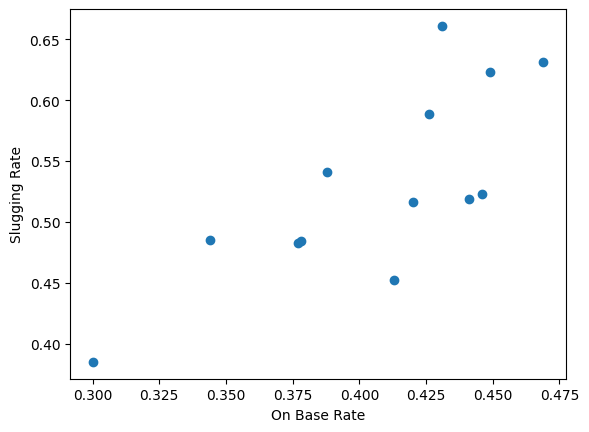

In [21]:
# 出塁率と長打率の関係

plt.scatter(data['出塁率'], data['長打率'])
plt.xlabel('On Base Rate')
plt.ylabel('Slugging Rate')
plt.show()